# pyhf hello world 2

Ryan Reece <https://github.com/rreece>        
created: 2019-03-03

## 2-bin example

Following: <https://scikit-hep.org/pyhf/examples/notebooks/binderexample/StatisticalAnalysis.html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pyhf
import math

In [2]:
pdf = pyhf.simplemodels.hepdata_like(signal_data=[12.0, 11.0], bkg_data=[50.0, 52.0], bkg_uncerts=[3.0, 7.0])


In [3]:
pdf.config.auxdata

[277.77777777777777, 55.183673469387756]

In [4]:
CLs_obs, CLs_exp_band = pyhf.infer.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, return_expected_set=True)
print('Observed CLs         : %.4f' % (CLs_obs))
print('')
print('Expected CLs -2 sigma: %.4f' % (CLs_exp_band[0]))
print('Expected CLs -1 sigma: %.4f' % (CLs_exp_band[1]))
print('Expected CLs         : %.4f' % (CLs_exp_band[2]))
print('Expected CLs +1 sigma: %.4f' % (CLs_exp_band[3]))
print('Expected CLs +2 sigma: %.4f' % (CLs_exp_band[4]))

Observed CLs         : 0.0529

Expected CLs -2 sigma: 0.0026
Expected CLs -1 sigma: 0.0138
Expected CLs         : 0.0645
Expected CLs +1 sigma: 0.2353
Expected CLs +2 sigma: 0.5730


## n-bin example

Following: <https://github.com/scikit-hep/pyhf/blob/master/tests/benchmarks/test_benchmark.py>

In [5]:
def generate_source_static(n_bins):
    """
    Create the source structure for the given number of bins.

    Args:
        n_bins: `list` of number of bins

    Returns:
        source
    """
    binning = list(range(n_bins+1))
    data = [120.0] * n_bins
    bkg = [100.0] * n_bins
    bkgerr = [10.0] * n_bins
    sig = [30.0] * n_bins

    source = {
        'binning': binning,
        'bindata': {'data': data, 'bkg': bkg, 'bkgerr': bkgerr, 'sig': sig},
    }
    return source


def generate_source_poisson(n_bins):
    """
    Create the source structure for the given number of bins.
    Sample from a Poisson distribution

    Args:
        n_bins: `list` of number of bins

    Returns:
        source
    """
    np.random.seed(0)  # Fix seed for reproducibility
    binning = list(range(n_bins+1))
    data = np.random.poisson(120.0, n_bins).tolist()
    bkg = np.random.poisson(100.0, n_bins).tolist()
    bkgerr = np.random.poisson(10.0, n_bins).tolist()
    sig = np.random.poisson(30.0, n_bins).tolist()

    source = {
        'binning': binning,
        'bindata': {'data': data, 'bkg': bkg, 'bkgerr': bkgerr, 'sig': sig},
    }
    return source


def hypotest(pdf, data):
    return pyhf.infer.hypotest(
        1.0,
        data,
        pdf,
        pdf.config.suggested_init(),
        pdf.config.suggested_bounds(),
        return_tail_probs=True,
        return_expected=True,
        return_expected_set=True,
        return_test_statistics=True,
    )

In [6]:
n_bins = 3
source = generate_source_poisson(n_bins)
pdf = pyhf.simplemodels.hepdata_like(source['bindata']['sig'], 
                                     source['bindata']['bkg'], 
                                     source['bindata']['bkgerr'])
data = source['bindata']['data'] + pdf.config.auxdata

In [7]:
results = hypotest(pdf, data)
len(results)

4

In [8]:
results

(array([0.01496651]),
 [array([0.01388749]), array([0.92790496])],
 array([0.00025142]),
 array([[3.31111922e-07],
        [9.92597178e-06],
        [2.51415394e-04],
        [4.63258639e-03],
        [4.95015888e-02]]))

In [9]:
source['bindata']['sig']

[26, 29, 32]

In [10]:
source['bindata']['bkg']

[98, 127, 109]

In [11]:
source['bindata']['bkgerr']

[4, 10, 10]

In [12]:
source['binning']

[0, 1, 2, 3]

In [13]:
#plt.style.use(hep.style.ATLAS)
plt.style.use([hep.style.CMS, hep.style.firamath])

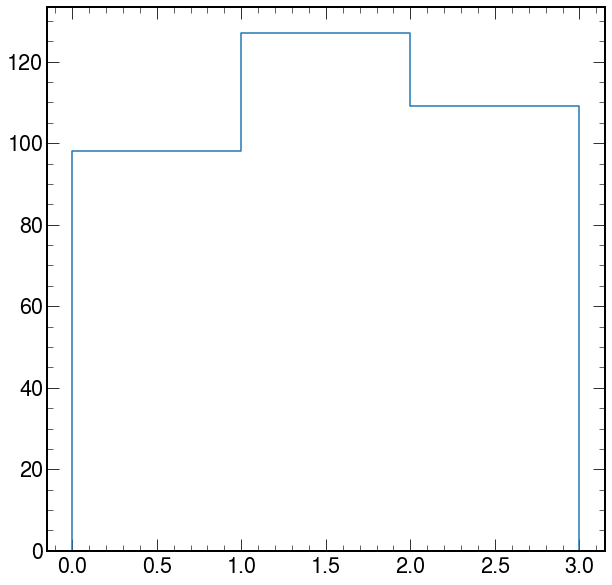

In [14]:
hep.histplot(source['bindata']['bkg'], source['binning'])

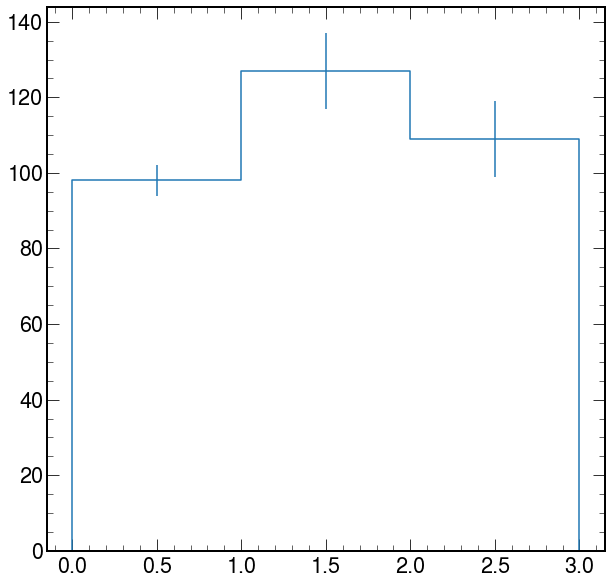

In [15]:
axs = hep.histplot(source['bindata']['bkg'], source['binning'], yerr=source['bindata']['bkgerr'])

## See also

-   <https://scikit-hep.org/pyhf/>
-   Cowan, G. et al. (2010). Asymptotic formulae for likelihood-based tests of new physics. https://arxiv.org/abs/1007.1727
-   Cranmer, K. et al. (2012). HistFactory: A tool for creating statistical models for use with RooFit and RooStats. CERN-OPEN-2012-016. <https://cds.cern.ch/record/1456844>
-   Feickert, M. (2018). pyhf: a pure Python implementation of HistFactory with tensors and autograd. <https://indico.cern.ch/event/759480/>